### ETAS: Iraq 2017
#### 19 September 2017,  04:49:21 UTC m=7.1
2017-11-12 18:18:17 UTC 34.886°N   45.941 W 23.2 km depth

lon: 45.941
lat: 34.886

In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

#
# on a fresh linux install... (can we script this?)
# stuff we have to do besides just clone this:
# pip install geopy
# conda install basemap
# pip install geographiclib
# conda install -c ioos rtree


failed while loading urllib and/or urllib. maybe python 3.x?


/home/myoder/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#mainshock_dt = dtm.datetime(2017, 11, 12, 18,18,17, tzinfo=pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# italy
#lat0 = 42.934
#lon0 = 13.043
#t0   = dtm.datetime(2016, 10, 26, 19, 18, 8, tzinfo=pytz.timezone('UTC'))
#m0   = 6.1
#
# newest event:
# 2016-11-13 11:02:56
t0 = dtm.datetime(2017, 11, 12, 18,18,17, tzinfo=pytz.timezone('UTC'))
t_ms = t0
#Location
lon0 = 45.941
lat0 = 34.886

m0 = 7.3
d_lat = 5.
d_lon = 5.
#d_lat = 2.5
#d_lon = 2.5
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]


In [4]:
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
cat_len_days = 3650
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 'cat_len':3650,
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':5.}

#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)
#
# TODO: integrate this directly into the globalETAS() class...
#my_cat = None
my_cat = atp.cat_from_anss_and_usgs(lons=lons, lats=lats, mc=eq_prams['mc'], cat_len_days=cat_len_days, 
                                    Nmax=None, rec_array=True)
if not my_cat is None:
    my_cat = gep.make_ETAS_catalog_mpp(incat=my_cat)
#
etas_name = 'Iraq and Iran, Nov 12 2017'
f_path = '/home/myoder/Dropbox/Research/etas/Iraq_2017_11_12/etas_{}'.format(eq_prams['t_now'])
f_root = 'etas_Iraq_20171112'

print('etas_name: {}'.format(etas_name))
print('f_path: {}'.format(f_path))
print('f_root: {}'.format(f_root))



url_str: http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv
data handle fetched...
 no file.
etas_prams:  {'do_recarray': False, 'b2': 1.5, 'b1': 1.0, 'dmstar': 1.0, 'q': 1.5, 'p': 1.1, 'fit_factor': 1.5, 'd_tau': 2.28, 'd_lambda': 1.76, 'D_fract': 1.5, 'date_range': ['1990-1-1', None], 'mc': 2.5, 'lons': [-117.0, -114.0], 'lats': [32.0, 38.0], 'incat': None}
results fetched.
etas_name: Iraq and Iran, Nov 12 2017
f_path: /home/myoder/Dropbox/Research/etas/Iraq_2017_11_12/etas_2017-11-14 07:13:53.967949+00:00
f_root: etas_Iraq_20171112


In [5]:
#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=nz_cat, **eq_prams)
etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=my_cat, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2007-11-17 07:13:53.967949+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 822], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1250]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2007-11-17 07:13:53.967949+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 822], [0, 1250])
etas_mpp worker xyz_range:  [1250, 2500]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2007-11-17 07:13:53.967949+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 822], [1250, 2500])
etas_mpp worker xyz_range:  [2500, 3750]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_no

In [6]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])
#
print('t_now: ', etas.t_now, max(etas.catalog['event_date']))

2017-11-14 07:13:53.967949+00:00
2007-11-17 07:13:53.967949+00:00 2017-11-14 07:13:53.967953+00:00 2017-11-14 07:13:53.967949+00:00 2017-11-12 18:18:17+00:00
t_now:  2017-11-14 07:13:53.967949+00:00 2017-11-14T01:45:49.000270


ms:  (datetime.datetime(2017, 11, 12, 18, 18, 17, 290), 34.90520095825195, 45.956298828125, 7.300000190734863, 19.0, 736645.7626967626, 77.62472870860773, 2091.6542603684097, 6.930823753977657e-06, 23.44229330092998, 283.5345908494466, 0.0009010299027572045, 1.0, 1.1, 1.5, array([  1.55191808,  13.57227137]), array([[-0.79674017,  0.60432202],
       [-0.60432202, -0.79674017]]), 45.0) 45.9562988281 34.9052009583


/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


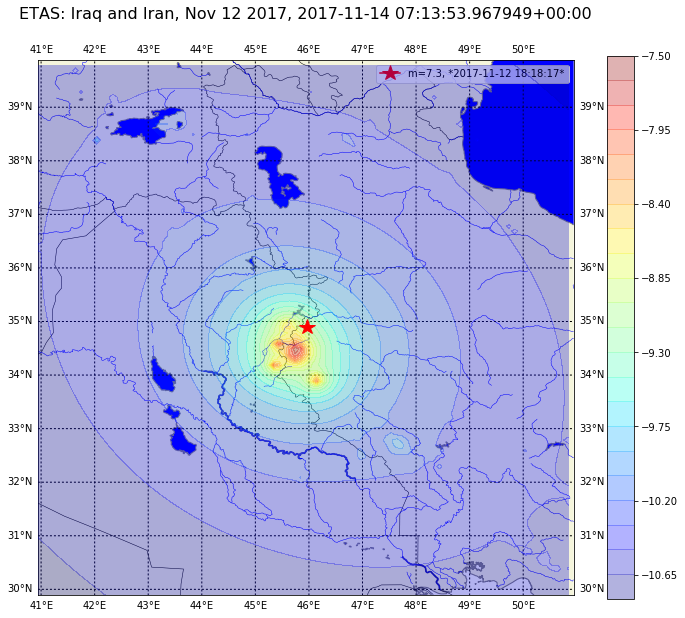

In [7]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

#mainshock = etas.catalog[-1]
mainshock = {'mag':7.3, 'lon':lon0, 'lat':lat0, 'event_date':dtm.datetime(2017,11,12,18,18,17, tzinfo=pytz.timezone('UTC'))}
# 2017-11-12 18:18:17 UTC 34.886°N 45.941 W 23.2 km
#
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
#dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([mainshock['lon']], [mainshock['lat']], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, latlon=False,
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

(0, 72.324489293969236)

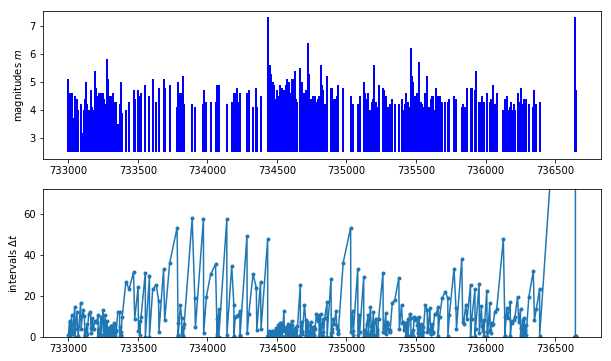

In [10]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')
ax2.set_ylim(0, 1.25*sorted(numpy.diff(f_dates))[-2])

/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/myoder/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


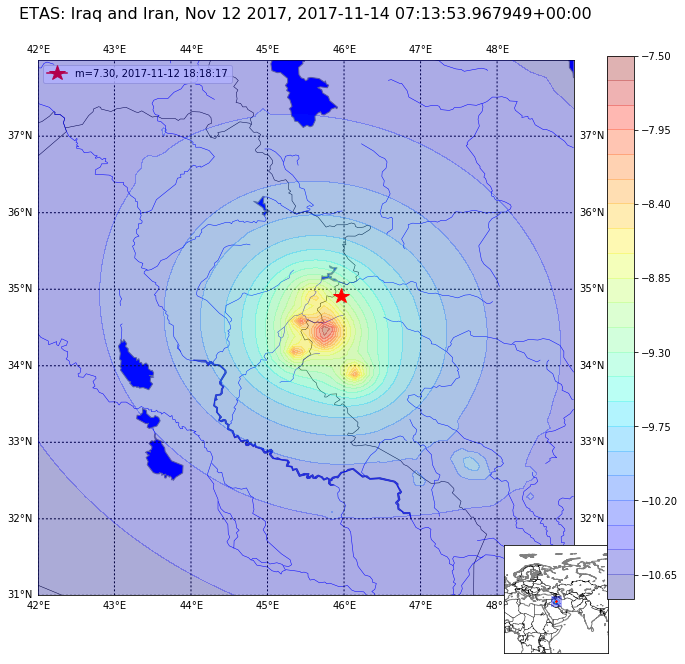

In [20]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
ax_mini = fg.add_axes([.65,.05, .15, .15])
cmap='jet'
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='i', alpha=.3, ax=ax, lats_map=[31., 38.],
                          lons_map=[42., 49.], map_cmap=cmap)

# etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='l', alpha=.3, ax=ax_mini, lats_map=[-89., 89.],
#                           lons_map=[-180., 180.], lat_interval=10., lon_interval=10.)

ll_lon_mini = max(-180, lon0-50.)
ll_lat_mini = max(-89, lat0-50)
ur_lon_mini = min(180., lon0+50.)
ur_lat_mini = max(89, lat0+50)
mp_mini = Basemap(llcrnrlon=ll_lon_mini, llcrnrlat=ll_lat_mini,
                                urcrnrlon=ur_lon_mini, urcrnrlat=ur_lat_mini,
                  resolution='l', projection=etas.cm.projection, lon_0=0., lat_0=0., ax=ax_mini)
mp_mini.drawcoastlines(color='gray', zorder=1)
mp_mini.drawcountries(color='black', zorder=1)

mp_mini.plot([x], [y], latlon=False, marker='*', color='r', ms=2, zorder=24)
#
X,Y = etas.cm(numpy.array(etas.lonses), numpy.array(etas.latses))
Z = numpy.log10(etas.lattice_sites)
#ax_mini.set_ylim(ll_lat_mini, ur_lat_mini)
#ax_mini.set_xlim(ll_lon_mini, ur_lon_mini)
#
etas_contours = ax_mini.contourf(X,Y, Z, 15, zorder=8, alpha=.3, cmap=cmap)
#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt_ms_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={:.2f}, {}'.format(mainshock['mag'], dt_ms_str))
ax.set_title('ETAS: {}, {}\n\n'.format(etas_name, etas.t_now), size=16)
#for j,m6 in enumerate(m6s):
for j,m6 in enumerate(sorted(sorted(m6s, key=lambda rw:rw['mag'])[:-1], key=lambda rw:rw['event_date'])):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={:.2f}, {}'.format(m6['mag'], dt_str))
    #
ax.legend(loc=0)

In [12]:
#print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
#len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
#     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])

print(dt, type(dt), dt.year)

2017-11-12 18:18:17.000290 <class 'datetime.datetime'> 2017


In [13]:
for rw in m6s:
    print(rw)

(datetime.datetime(2017, 11, 12, 18, 18, 17, 290), 34.90520095825195, 45.956298828125, 7.300000190734863, 19.0, 736645.7626967626, 77.62472870860773, 2091.6542603684097, 6.930823753977657e-06, 23.44229330092998, 283.5345908494466, 0.0009010299027572045, 1.0, 1.1, 1.5, array([  1.55191808,  13.57227137]), array([[-0.79674017,  0.60432202],
       [-0.60432202, -0.79674017]]), 45.0)


In [14]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))), 
                kml_contours_bottom=.25, kml_contours_top=1.0)

etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
    pickle.dump(etas, fpkl)

kml bottom, top:  5 22


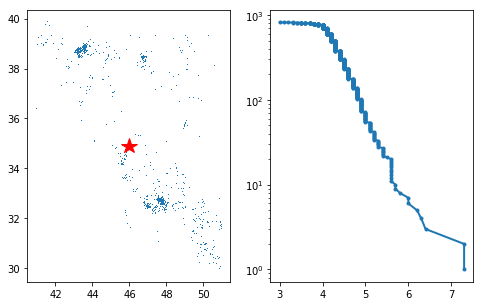

In [15]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [16]:
#print(etas.mc, etas.mc_etas)

In [17]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [18]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


data handle fetched...
 no file.


data handle fetched...
 no file.
[ (datetime.datetime(2017, 1, 13, 23, 0, 3, 190000), 32.7071, 47.5043, 4.1, 10.0, 736342.9583702546)
 (datetime.datetime(2017, 1, 22, 6, 47, 40, 190000), 32.6188, 49.708, 4.7, 21.97, 736351.2831040509)
 (datetime.datetime(2017, 2, 4, 17, 34, 36, 580000), 31.3529, 49.4858, 4.2, 40.98, 736364.7323678241)
 (datetime.datetime(2017, 2, 28, 6, 17, 23, 610000), 39.2407, 46.5002, 3.6, 10.0, 736388.2620788194)
 (datetime.datetime(2017, 2, 28, 16, 29, 24, 60000), 30.3737, 50.6045, 4.3, 10.0, 736388.6870840278)]
2017-02-28T16:29:24.060000


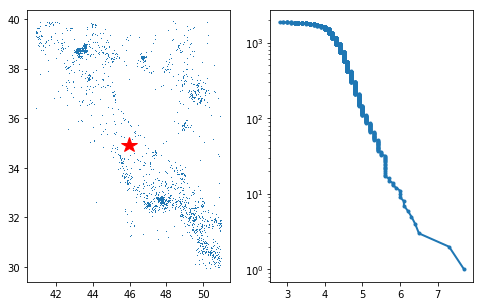

In [19]:
test_cat = atp.catfromANSS(lat=lats, lon=lons, minMag=1.5,
                           dates0=[dtm.datetime(1990,1,1, tzinfo=pytz.utc), dtm.datetime.now(pytz.utc)])


plt.figure()
plt.clf()
#plt.plot(test_cat['lon'], test_cat['lat'], '.')
print(test_cat[-5:])
print(max(test_cat['event_date']))

plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(test_cat['lon'], test_cat['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(test_cat['mag']))], numpy.arange(1,len(test_cat)+1),
         '.-', lw=2.)
ax2.set_yscale('log')